# Lecture 1 - Introduction to Machine Learning & The Decision Tree Algorithm

*Hayley Boyce, Monday April 19th 2021*

## Welcome

Welcome to Bait 509 - Business Application of Machine Learning.

```{note}
Buckle up because there are going to be a lot of new concepts here but in the lyrics of Trooper "We're here for a good time, 
Not a long time". 
```

### Course Learning Objectives

1.	Describe fundamental machine learning concepts such as: supervised and unsupervised learning, regression and classification, overfitting, training/validation/testing error, parameters and hyperparameters, and the golden rule.
2.	Broadly explain how common machine learning algorithms work, including: naïve Bayes, k-nearest neighbors, decision trees, support vector machines, and logistic regression.
3.	Identify when and why to apply data pre-processing techniques such as scaling and one-hot encoding.
4.	Use Python and the scikit-learn package to develop an end-to-end supervised machine learning pipeline.
5.	Apply and interpret machine learning methods to carry out supervised learning projects and to answer business objectives.

### Course Structure
- 2 lectures per week (Synchonus lecture + class activity)
- My office hours: 1-2pm Thursday on Zoom
- TA office hours: Fridays 12-1 and Wednesday 4-5. (all the links are created 
- Camera on policy!
- Course content available on [this website](https://bait509-ubc.github.io/BAIT509/intro.html) or on [Canvas](https://canvas.ubc.ca/courses/58082). 
- We will be using [Piazza](https://piazza.com/configure-classes/winterterm22020/bait509ba1) for discussions and questions.
- Assessments:

| Assessment       | Weight       | Due                            |
|     :---:        | :---:        | :---:                          |
| 3 Assignments    | 60%(20% each)| April 28th, May 10th, May 19th |
| 1 Quiz           | 10%          | May 5th (24 hours to complete) |
| Final Project    | 30%          | May 29th                       |


All assessments will be submitted via Canvas 

### Who I am

![](imgs/hi.png)

- I have an undergraduate degree in Applied Mathematics from the University of Western Ontario
- I have a master's degree in Data Science from UBC.  
- I have experience in Python, R, Tableau, some Latex, Some HTML and CSS and dabble in a few other things - Jack of all trades, master of none. 
- Worked with companies like Riversol Skincare and Freshprep. 

### Your TAs

- **Daniel Ramandi**: in class questions.
- **Ali Seyfi**: Office hours Wednesdays 4-5pm (Starting April 28th).
- **Andy Tai**: Office hours Fridays 12-1pm.


- Marking your assignments, quiz and project.
- All 4 of us will be answering questions on Piazza as well.

### Python, Jupyter, Visualizations 

- In this course we be using Python and Jupyter notebooks for lectures as well as assignments. 
- You are free to use [Anaconda distribution](https://www.anaconda.com/distribution/) to install and manage your Python package installations.
- If you are using anaconda, you can install a few key packages we will be using in the course, by typing the following at the command line:
    > `conda install pandas numpy scikit-learn matplotlib jupyter altair seaborn python-graphviz`

- Or you can simpling use pip and type in at the command line: 
    > `pip install pandas numpy scikit-learn matplotlib jupyter altair seaborn graphviz`


- We will be making visualizations for this course and I give the option of plotting using any Python library but I strongly recommend getting familar with [`altair`](https://altair-viz.github.io/index.html). I have 2 very quick slide decks that teach you a bit about how to plot using `altair`. 
From the course [Programming in Python for Data Science](https://prog-learn.mds.ubc.ca/en/)
 - Module 1, exercise 31, 32, 33
 - Module 2, exercise 29, 30
 
And if you want to dive further there is a whole course dedicated to visualizing plots using `altair` called [Data Visualization](https://viz-learn.mds.ubc.ca/en/).


### Lecture Learning Objectives 

- Explain motivation to study machine learning.
- Differentiate between supervised and unsupervised learning.
- Differentiate between classification and regression problems.
- Explain machine learning terminology such as features, targets, training, and error.
- Explain the `.fit()` and `.predict()` paradigm and use `.score()` method of ML models.
- Broadly describe how decision trees make predictions.
- Use `DecisionTreeClassifier()` and `DecisionTreeRegressor()` to build decision trees using scikit-learn.
- Explain the difference between parameters and hyperparameters.
- Explain how decision boundaries change with `max_depth`.

## What is Machine Learning (ML)?

In [1]:
# Let's import our libraries
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Machine learning is all around us. You can find it in things like: 


![](imgs/examples.png)


- Voice assistance
- Google news
- Recommender systems
- Face recognition
- Auto completion
- Stock market predictions
- Character recognition
- Self-driving cars
- Cancer diagnosis
- Drug discovery

Machine Learning has no clear consensus in how it is define but essentially it is a different way to think about problem solving. 

-  As the [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) book puts it, ML is a “*vast set of tools for understanding data*” 
- Usually we think logically and mathematically. In the Machine Learning paradiagm we instead take data and some output and our Machine Learning algorithm will return a program which can be used to make predictions and give an output for data it has yet to see. 

### Examples of Machine Learning 

*In all the the upcoming examples, Don't worry about the code. Just focus on the input and output in each example.*


#### Example 1: Predict Housing Prices
**Data Attribution:** <a href="https://www.kaggle.com/harlfoxem/housesalesprediction" target="_blank">house sales prediction dataset.</a>

In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df = df.drop(columns=["id", "date"])
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4)
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8583,509000.0,2,1.50,1930,3521,2.0,0,0,3,8,1930,0,1989,0,98007,47.6092,-122.146,1840,3576
19257,675000.0,5,2.75,2570,12906,2.0,0,0,3,8,2570,0,1987,0,98075,47.5814,-122.050,2580,12927
1295,420000.0,3,1.00,1150,5120,1.0,0,0,4,6,800,350,1946,0,98116,47.5588,-122.392,1220,5120
15670,680000.0,8,2.75,2530,4800,2.0,0,0,4,7,1390,1140,1901,0,98112,47.6241,-122.305,1540,4800
3913,357823.0,3,1.50,1240,9196,1.0,0,0,3,8,1240,0,1968,0,98072,47.7562,-122.094,1690,10800


In [3]:
X_train = train_df.drop(columns=["price"])
y_train = train_df["price"]
X_test = test_df.drop(columns=["price"])
y_test = test_df["price"]

In [4]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train);

In [5]:
pred_df = pd.DataFrame({"Predicted price": model.predict(X_test[0:4]).tolist(), "Actual price": y_test[0:4].tolist()})
df_concat = pd.concat([X_test[0:4].reset_index(drop=True), pred_df], axis=1)
df_concat.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Predicted price,Actual price
0,4,2.25,2130,8078,1.0,0,0,4,7,1380,750,1977,0,98055,47.4482,-122.209,2300,8112,333981.6250,311100.0
1,3,2.50,2210,7620,2.0,0,0,3,8,2210,0,1994,0,98052,47.6938,-122.130,1920,7440,615222.4375,535000.0
2,4,1.50,1800,9576,1.0,0,0,4,7,1800,0,1977,0,98045,47.4664,-121.747,1370,9576,329770.0625,271000.0
3,3,2.50,1580,1321,2.0,0,2,3,8,1080,500,2014,0,98107,47.6688,-122.402,1530,1357,565091.6250,705000.0


#### Example 2: Predict Creditcard Default 

**Data Attribution:** <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud" target="_blank">credit card fraud detection data set</a>

In [6]:
cc_df = pd.read_csv("data/creditcard_sample.csv")

train_df, test_df = train_test_split(cc_df, test_size=4, random_state=603)
train_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
435,11635.0,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,...,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00,1
92731,131346.0,-3.941407,4.044901,-2.533298,-0.993555,-0.898294,-1.503311,-0.105561,0.980689,1.849424,...,0.203494,1.136865,0.237484,-0.007889,-0.112597,-0.194324,0.998080,0.859768,1.25,0
18116,150854.0,2.165206,-1.581097,-0.198485,-1.538046,-1.799368,-0.423766,-1.546484,0.047633,-1.120714,...,-0.287639,-0.421235,0.439597,-0.054263,-0.675064,-0.463137,0.036825,-0.041266,32.00,0
89892,43946.0,-0.750949,0.705118,1.548844,1.527885,-0.396129,1.405321,-0.100160,0.788641,0.326592,...,-0.273203,-0.495237,0.076831,-0.758812,-0.212445,-0.386653,0.094166,0.089781,71.38,0
118178,124744.0,2.047701,-0.131199,-1.695760,0.028476,0.516568,-0.315328,0.100865,-0.127223,0.375452,...,0.264380,0.815539,-0.055716,0.227954,0.318705,-0.130535,-0.032855,-0.064604,17.76,0


In [7]:
from xgboost import XGBClassifier
X_train = train_df.drop(columns=['Class'])
y_train = train_df['Class']
X_test = test_df.drop(columns=['Class'])
y_test = test_df['Class']
model = XGBClassifier()
model.fit(X_train, y_train);

In [8]:
pred_df = pd.DataFrame({"predicted_label": model.predict(X_train).tolist()})
df_concat = pd.concat([X_train.reset_index(drop=True), pred_df], axis=1)
df_concat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,predicted_label
0,11635.0,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,...,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00,1
1,131346.0,-3.941407,4.044901,-2.533298,-0.993555,-0.898294,-1.503311,-0.105561,0.980689,1.849424,...,0.203494,1.136865,0.237484,-0.007889,-0.112597,-0.194324,0.998080,0.859768,1.25,0
2,150854.0,2.165206,-1.581097,-0.198485,-1.538046,-1.799368,-0.423766,-1.546484,0.047633,-1.120714,...,-0.287639,-0.421235,0.439597,-0.054263,-0.675064,-0.463137,0.036825,-0.041266,32.00,0
3,43946.0,-0.750949,0.705118,1.548844,1.527885,-0.396129,1.405321,-0.100160,0.788641,0.326592,...,-0.273203,-0.495237,0.076831,-0.758812,-0.212445,-0.386653,0.094166,0.089781,71.38,0
4,124744.0,2.047701,-0.131199,-1.695760,0.028476,0.516568,-0.315328,0.100865,-0.127223,0.375452,...,0.264380,0.815539,-0.055716,0.227954,0.318705,-0.130535,-0.032855,-0.064604,17.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122140,139707.0,-1.552052,-0.426797,1.851288,0.293626,0.699572,0.532052,0.453493,0.293692,0.506065,...,0.360463,0.894224,-0.240568,0.505866,1.321357,-0.272364,0.004121,0.084357,150.00,0
122141,43820.0,-0.368688,1.830310,-0.627941,0.576034,1.320220,-1.710630,1.368100,-0.145559,-1.005464,...,-0.009978,-0.062058,-0.226465,0.172577,-0.271303,-0.583125,0.186213,0.248723,1.00,0
122142,44481.0,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,...,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,0.76,0
122143,140320.0,1.911069,-1.197637,-0.869888,-0.509239,-0.650403,0.307150,-0.788578,0.089105,-0.023531,...,-0.536584,-1.215170,0.238137,-1.249489,-0.492226,-0.619841,0.032800,-0.029455,118.28,0


In [9]:
model.score(X_test, y_test)

1.0

#### Example 3: Image Classification

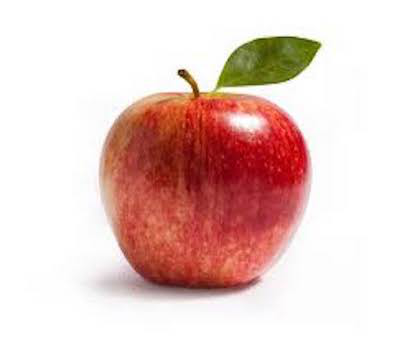

In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import sys
sys.path.append('code/')
from toy_classifier import classify_image


img = Image.open("imgs/apple.jpg")
img

In [11]:
classify_image(img, 5)

Class, Probability
------------------
Granny Smith, 0.80
pomegranate, 0.08
fig, 0.07
strawberry, 0.04
buckeye, horse chestnut, conker, 0.00


## Types of Machine Learning

- **Supervised learning** (this course)
- Unsupervised learning

### Supervised Learning: 

> Example: Labelling emails as spam or not

- In supervised machine learning, we have a set of observations usually denoted with an uppercase `X`.
- We also have a set of corresponding targets usually denoted with a lowercase `y`. 
- Our goal is to define a function that relates `X` to `y`. 
- We then use this function to predict the targets of new examples. 

<br>
<br>

<img src='imgs/sup-learning.png'  width = "75%" alt="404 image" />


### UnSupervised Learning: (not going into detail here)  

> Example: Categorizing Google News articles.


- In unsupervised learning, we are not given targets and are only given observations `X`. 
- We apply some clustering algorithms to create a model that finds patterns in our data and groups together similar characteristics from our data.



<img src='imgs/unsup-learning.png'  width = "75%" alt="404 image" />

## Types of Supervised Learning: Classification vs Regression

- Classification
- Regression

### Classification

**Classification** predicting among two or more categories, also known as classes.
- *Example1*: Predict whether a customer will default on their credit card or not. 
- *Example2*: Predict if an animal is a reptile, mammal or bird. 
    

### Regression

**Regression** predicting a continuous (in other words, a number) value.
- Example1: Predict housing prices
- Example2: Predict the length of a snake. 
    
    
<img src="imgs/classification-vs-regression2.png" width = "90%" alt="404 image" />


## Let's Practice! 


Are the following supervised or unsupervised problems?

1. Finding groups of similar properties in a real estate data set.
2. Predicting real estate prices based on house features like number of rooms, learning from past sales as examples.
3. Identifying groups of animals given features such as "number of legs", "wings/no wings", "fur/no fur", etc.
4. Detecting heart disease in patients based on different test results and history.
5. Grouping articles on different topics from different news sources (something like Google News app).

Are the following classification or regression problems?

1. Predicting the price of a house based on features such as number of rooms and the year built.
2. Predicting if a house will sell or not based on features like the price of the house, number of rooms, etc.
3. Predicting your grade in BAIT 509 based on past grades.
4. Predicting whether you should bicycle tomorrow or not based on the weather forecast.
5. Predicting a cereal’s manufacturer given the nutritional information.

## Tabular Data and Terminology

Basic terminology used in ML:

- **examples/observations** = rows 
- **features/variables** = inputs (columns)
- **targets** = outputs (one special column)
- **training** = learning = fitting

<img src="imgs/sup-ml-terminology2.png" width = "90%" alt="404 image" />


### Example:

- This [dataset](http://simplemaps.com/static/demos/resources/us-cities/cities.csv) contains longtitude and latitude data for 400 cities in the US.
- Each city is labelled as `red` or `blue` depending on how they voted in the 2012 election.

In [12]:
df = pd.read_csv('data/cities_USA.csv', index_col=0).sample(20, random_state=77)
df

,lon,lat,vote
104,-83.015008,35.882967,red
205,-105.065549,39.828572,blue
267,-95.827648,41.364378,blue
314,-83.304149,42.629449,blue
53,-89.115371,32.757224,red
16,-81.640596,29.559354,blue
282,-86.242893,41.700570,red
123,-82.852313,37.421491,red
47,-85.678746,32.166252,red
250,-85.606726,40.861792,red


In [13]:
df.shape

(20, 3)

In this dataset, we have:
- 2 **features**, (3 columns = 2 **features** + 1 target) and,
- 20 **examples**.

Our **target** column is `vote` since that is what we are interesting in predicting. 

## Decision Tree Algorithm

### A conceptual introduction to Decision Trees

Shown below is some hypothetical data with 2 features (x and y axes) and 1 target (with 2 classes).   
The supervised learning problem here is to predict whether a particular observaton belongs to the <font color='blue'>**BLUE**</font> or <font color='orange'>**ORANGE**</font> class.    
A fairly intuitive way to do this is to simply use thresholds to split the data up.

<img src='imgs/scatter_dt1.png'  width = "40%" alt="404 image" />

For example, we can **split** the data at `Feature_1 = 0.47`.   
Everything **less than** the split we can classify as <font color='orange'>**ORANGE**</font>.  
Everything **greater than** the split we can classify as <font color='blue'>**BLUE**</font>.   
By this method, we can successfully classify 7 / 9 observations.

<img src='imgs/scatter_dt2.png'  width = "40%" alt="404 image" />

But we don't have to stop there, we can make another split!   
Let's now split the section that is greater than `Feature_1 = 0.47`, using `Feature_2 = 0.52`.
We now have the following conditions:    
- If `Feature_1 > 0.47` and `Feature_2 < 0.52` classify as <font color='blue'>**BLUE**</font>.    
- If `Feature_1 > 0.47` and `Feature_2 > 0.52` classify as <font color='orange'>**ORANGE**</font>.    

Using these rules, we now successfully classify 8 / 9 observations.  

<img src='imgs/scatter_dt3.png'  width = "40%" alt="404 image" />

Okay, let's add one more threshhold.    
Let's make a final split of the section that is less than `Feature_1 = 0.47`, using `Feature_2 = 0.6`.   
By this methodology we have successfully classified all of our data.   

<img src='imgs/scatter_dt4.png'  width = "40%" alt="404 image" />

What we've really done here is create a group of `if` statements:     
- If `Feature_1 < 0.47` and `Feature_2 < 0.6` classify as <font color='orange'>**ORANGE**</font>
- If `Feature_1 < 0.47` and `Feature_2 > 0.6` classify as <font color='blue'>**BLUE**</font>
- If `Feature_1 > 0.47` and `Feature_2 < 0.52` classify as <font color='blue'>**BLUE**</font>
- If `Feature_1 > 0.47` and `Feature_2 > 0.52` classify as <font color='orange'>**ORANGE**</font>

This is easier to visualize as a tree:

<img src='imgs/toy_tree.png'  width = "40%" alt="404 image" />

We just made our first decision tree!

Before we go forward with learning about decision tree classifiers and reggressors we need to understand the structure of a decision tree.
Here is the key terminology that you will have to know: 

- **Root**: Where we start making our conditions.
- **Branch**:  A branch connects to the next node (statement). Each branch represents either true or false.
- **Internal node**: conditions within the tree.  
- **Leaf**: the value predicted from the conditions. 
- **Tree depth**: The longest path from the root to a leaf.

With the decision tree algorithm in machine learning, the tree can have at most two nodes resulting from it, also known as children.

If a tree only has a depth of 1, we call that a **decision stump**.

<img src="imgs/lingo_tree.png"  width = "55%" alt="404 image">

This tree  and the one in our example above, both have a depth of 2.

Trees do not need to be balanced. (You'll see this shortly)

### Implimentation with Scikit-learn

Before we build any model (we are getting to that so hang tight), we need to make sure we have the right "parts" aka inputs and outputs. 

That means we need to split up our tabular data into the features and the target, also known as $X$ and $y$.

$X$ is all of our features in our data, which we also call our ***feature table***. <br>
$y$ is our target, which is what we are predicting.

In [14]:
X = df.drop(columns=["vote"])
y = df["vote"]

In [15]:
X.head()

,lon,lat
104,-83.015008,35.882967
205,-105.065549,39.828572
267,-95.827648,41.364378
314,-83.304149,42.629449
53,-89.115371,32.757224


In [16]:
y.head()

104     red
205    blue
267    blue
314    blue
53      red
Name: vote, dtype: object

There are several machine learning libraries available to use but for this course, we will be using the  Scikit-learn (hereafter, referred to as sklearn) library, which is a popular (41.6k stars on Github) Machine Learning library for Python.


- We generally import a particular ML algorithm using the following syntax:
> `from sklearn.module import algorithm`

The decision tree classification algorithm (`DecisionTreeClassifier`) sits within the `tree` module.  
(Note there is also a Decision Tree Regression algorithm in this module which we'll come to later...)  
Let's import the classifier using the following code:  

In [17]:
from sklearn.tree import DecisionTreeClassifier

We can begin creating a model by instantiating an instance of the algorithm class.    
Here we are naming our decision tree model `model`:   

In [18]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

At this point we just have the framework of a model.    
We can't do anything with our algorithm yet, because it hasn't seen any data!     
We need to give our algorithm some data to learn/train/fit a model.    

We can now use the `.fit()` method to train our model using the feature `X` and target `y` data we just separated.  
When we call fit on our model object, the actual learning happens. 

In [19]:
model.fit(X, y)

DecisionTreeClassifier()

Now we've used data to learn a model, let's take a look at the model we made!    
The code below prints out our model structure for us (like the tree we made ourselves earlier)   

*Note: This `display_tree`, function was adapted from the `graphviz` library with some amendments to make the trees easier to understand. You can find the code in the `script` file on Canvas.*   

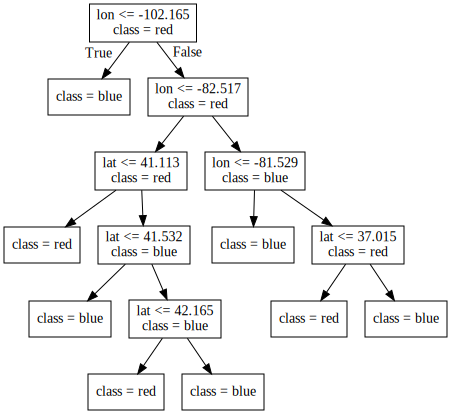

In [20]:
sys.path.append('code/')
from display_tree import display_tree
display_tree(X.columns, model, "imgs/decision_tree")

We can better visualize what's going on by actually plotting our data and the model's  **decision boundaries**.

*Note: This `plot_classifier` made by Mike Gelbart, function is available for installation [here](https://github.com/mgelbart/plot-classifier) or using:*
>`pip install git+git://github.com/mgelbart/plot-classifier.git`

or with conda

> `conda install git` <br>
> `conda install pip`<br>
> `pip install git+git://github.com/mgelbart/plot-classifier.git`

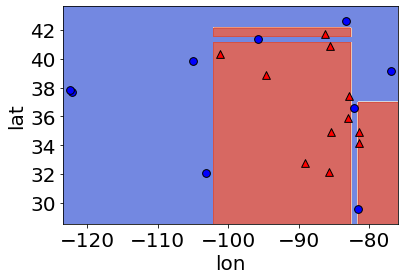

In [21]:
from plot_classifier import plot_classifier

plot_classifier(X, y, model, ticks=True)
plt.xticks(fontsize= 20);
plt.yticks(fontsize= 20);
plt.xlabel('lon', fontsize=20);
plt.ylabel('lat', fontsize=20);  

In this plot the shaded regions show what our model predicts for different feature values.  
The scatter points are our actual 20 observations.    
From the above plot, we can see that our model is classifying all our observations correctly, but there's an easier way to find out how our model is doing.   
We can predict the target of examples by calling `.predict()` on the classifier object.     
Let’s see what it predicts for a single randomly new observation first:

In [22]:
new_ex = [-87.4, 59]
new_example = pd.DataFrame(data= [new_ex], columns = ["lon", "lat"])
new_example

,lon,lat
0,-87.4,59


In [23]:
model.predict(new_example)

array(['blue'], dtype=object)

we get a prediction of `red` for this example!

We can also predict on our whole feature table - Here, we are predicting on all of X.

In [24]:
model.predict(X)

array(['red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red',
       'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'red'], dtype=object)

In [25]:
pd.DataFrame({'true_values' : y.to_numpy(), 'predicted' : model.predict(X)})

,true_values,predicted
0,red,red
1,blue,blue
2,blue,blue
3,blue,blue
4,red,red
5,blue,blue
6,red,red
7,red,red
8,red,red
9,red,red


Or if we just want to know how many we got right, in the classification setting, we can use  `score()` which gives the accuracy of the model, i.e., the proportion of correctly predicted examples.

Sometimes we will also see people reporting **error**, which is usually 1 - accuracy. 

Our model has an accurary of 100% (or 0% error)!

In [26]:
model.score(X,y)

1.0

### How does `.predict()` work?

For us to see how our algorithm predicts for each example, all we have to do is return to our Decision Tree. 

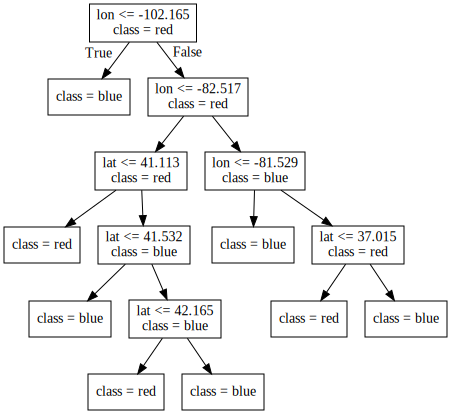

In [27]:
display_tree(X.columns, model, "imgs/decision_tree")

Let's use our `new_example` object for this example.

In [28]:
new_example

,lon,lat
0,-87.4,59


First we start at the root. <br>
Is `lon` < -102.165? False, so we go down the right branch. <br>
Is `lon` < -81.529? True , so we go down the left branch . <br>
We arrive at another node. Is `lat` < 41.113? True , so we go down the left branch and arrive at a prediction of `red`! <br>

Let's check this using predict again. 

In [29]:
model.predict(new_example)

array(['blue'], dtype=object)

Nice!

### How does `.fit()` work?

Or "How does do Decision Trees decide what values to split on?"


We will not go into detail here, but there the important thing to note here is: 

- We evaluate the utility of a split using a mathematical formula (see [here](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)) where we minimize impurity at each question/node (gives you the least hetegeneous splits)

- Common criteria to minimize impurity
    - Gini Index
    - Information gain
    - Cross entropy 


## Let's Practice! 

Using the data `candybars.csv` from the datafolder to aswer the following questions:

1. How many features are there?
2. How many observations are there? 
3. What would be a suitable target with this data?

In [30]:
candy_df = pd.read_csv('data/candybars.csv', index_col=0)
candy_df.head()

,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,availability
candy bar,,,,,,,,,
CoffeeCrisp,1,0,0,0,1,0,0,0,Canada
Butterfinger,1,1,1,0,0,0,0,0,America
Skor,1,0,1,0,0,0,0,0,Both
Smarties,1,0,0,0,0,0,0,1,Canada
Twix,1,0,1,0,1,0,0,1,Both


In [31]:
candy_df.shape

(25, 9)

***Answer as either `fit`  or `predict`***
1. Is called first (before the other one).
2. Only takes X as an argument.
3. In scikit-learn, we can ignore its output.In scikit-learn, we can ignore its output.

***Quick Questions***
1. What is the top node in a decision tree called? 
2. What Python structure/syntax are the nodes in a decision tree similar to? 

## Parameters and Hyperparameters

- ***Parameters***:  Derived during training
- ***Hyperparameters***: Adjustable parameters that can be set before training. 



### Parameters 

When you call `fit` (the training stage of building your model), **parameters** get set, like the split variables and split thresholds. 


<img src='imgs/parameters.png'  width = "30%" alt="404 image" />
 

### Hyperparameters

But even before calling `fit` on a specific data set, we can set some some "knobs" which that control the learning which are called **hyperparameters**. 

In scikit-learn, hyperparameters are set in the constructor.

`max_depth`is a hyperparameter (of many) that lets us decide and set how "deep" we allow our tree to grow.

Let's practice by making a decision stump (A tree with a depth of 1). Our last model was made where we set the depth to "unlimited" so we need to initial a new model and train a new where where we set the `max_depth` hyperparameter. 

In [32]:
model_1 = DecisionTreeClassifier(max_depth=1).fit(X, y)
model_1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

Let's see what the tree looks like now.  

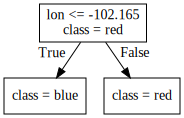

In [33]:
display_tree(X.columns, model_1, "imgs/decision_stump")

We see that it's a depth of one and split on `lon` at -102.165. 

- The hyperparameter `max_depth`  is being set by us at 1.
- The parameter `lon` is set by the algorithm at -102.165. 

We can see the decision boundary at `lon`= -102.165 with the vertical line in the plot below. 

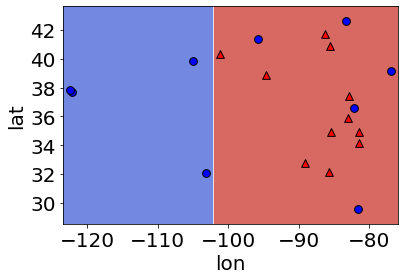

In [34]:
plot_classifier(X, y, model_1, ticks=True)
plt.xticks(fontsize= 20);
plt.yticks(fontsize= 20);
plt.xlabel('lon', fontsize=20);
plt.ylabel('lat', fontsize=20);  

- Looking  at the score of this model, we get an accuracy of 75%.

In [35]:
model_1.score(X, y)

0.75

Let's try growing a more complex tree model and now set `max_depth = 3`

In [36]:
model_3 = DecisionTreeClassifier(max_depth=3).fit(X, y)

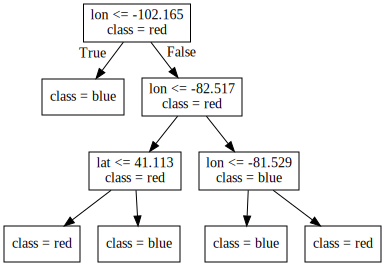

In [37]:
display_tree(X.columns, model_3, "imgs/dt_2")

This has 4 splits in the tree so we expect 4 decision boundaries (2 on `lon` and 2 on `lat`). 

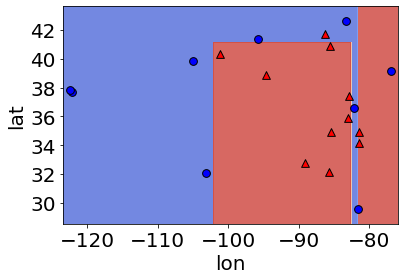

In [38]:
plot_classifier(X, y, model_3, ticks=True)
plt.xticks(fontsize= 20);
plt.yticks(fontsize= 20);
plt.xlabel('lon', fontsize=20);
plt.ylabel('lat', fontsize=20);  

- Looking at the score of this model now get an accuracy of 90%! 

In [39]:
model_3.score(X, y)

0.9

Let's do one more and set `max_depth = 5`.

In [40]:
model_5 = DecisionTreeClassifier(max_depth=5).fit(X, y)

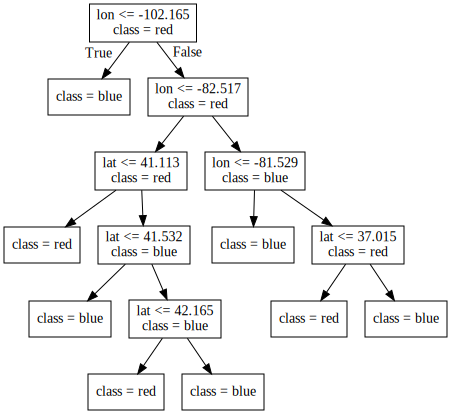

In [41]:
display_tree(X.columns, model_5, "imgs/dt_5")

This has 7 splits in the tree. How many decision boundaries should there be?

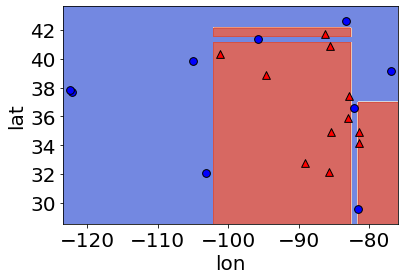

In [42]:
plot_classifier(X, y, model_5, ticks=True)
plt.xticks(fontsize= 20);
plt.yticks(fontsize= 20);
plt.xlabel('lon', fontsize=20);
plt.ylabel('lat', fontsize=20);  

And if we check the score of this model we get 100% accuracy! 

In [43]:
model_5.score(X, y)

1.0

We see here that as `max_depth` increases, the accuracy of the training data does as well.

Doing this isn’t always the best idea and we’ll explain this a little bit later on.

- This is just one of many other hyperparameters for decision trees that you can explore -> link <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">here</a> There are many other hyperparameters for decision trees that you can explore at the link <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">here</a>.

To summarize this section:
- **parameters** are automatically learned by an algorithm during training
- **hyperparameters** are specified before training

## Decision Tree Regressor 

We saw that we can use decision trees for classification problems but we can also use this decision tree algorithm for regression problems.  

Instead of using Gini impurity (which we briefly mentioned this above), we can use <a href="https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation" target="_blank">some other criteria</a> for splitting. 

(A common one is mean squared error (MSE) which we will discuss shortly)

`scikit-learn` supports regression using decision trees with `DecisionTreeRegressor()` and the `.fit()` and `.predict()` paradigm that is similar to classification.

Let's do an example using the `kc_house_data` we saw in example 1. 

In [44]:
df = pd.read_csv("data/kc_house_data.csv")
df = df.drop(columns=["id", "date"])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
X = df.drop(columns=["price"])
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
y = df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

We can see that instead of predicting a categorical column like we did with `vote` before, our target column is now numeric. 

Instead of importing `DecisionTreeClassifier`, we import `DecisionTreeRegressor`.

We follow the same steps as before and can even set hyperparameters as we did in classification. 

Here, when we build our model, we are specifying a `max_depth` of 3. 

This means our decision tree is going to be constrained to a depth of 3.

In [47]:
from sklearn.tree import DecisionTreeRegressor

depth = 3
reg_model = DecisionTreeRegressor(max_depth=depth, random_state=1)
reg_model.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

Let's look at the tree it produces our leaves used to contain a categorical value for prediction, but this time we see our leaves are predicting numerical values.

<img src='imgs/dt_reg.png'  width = "100%" alt="404 image" />

Let's see what our model predicts for a single example. 

In [48]:
X.loc[[0]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [49]:
reg_model.predict(X.loc[[0]])

array([269848.39378011])

Our model predicts a housing price of $269848.39 

Should we see what the true value is? 

In [50]:
y.loc[[0]]

0    221900.0
Name: price, dtype: float64

The true value is $221900.0, but how well did it score? 

With regression problems we can't use accuracy for a scoring method so instead when we use `.score()`  it returns somethings called an <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" target="_blank"> 𝑅2 </a>.

In [51]:
reg_model.score(X,y)

0.6069320183816143

The maximum 𝑅2 is 1 for perfect predictions. 

It can be negative which is very bad. 

## Let's Practice 

Using the data `candybars.csv` from the datafolder (or going to exercise 7 [here](https://ml-learn.mds.ubc.ca/en/module2))  for the following:
1. Define two objects named `X` and `y` which contain the features and target column respectively.
2. Using sklearn, create 3 different decision tree classifiers using 3 different `min_samples_split` values based on this data.
3. What is the accuracy of each classifier on the training data?
4. a) Which `min_samples_split` value would you choose to predict this data? <br>
   b) Would you choose the same `min_samples_split` value to predict new data?
5. Do you think most of the computational effort for a decision tree takes place in the `.fit()` stage or `.predict()` stage?

In [52]:
candy_df = pd.read_csv('data/candybars.csv', index_col=0)
candy_df.head()

,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,availability
candy bar,,,,,,,,,
CoffeeCrisp,1,0,0,0,1,0,0,0,Canada
Butterfinger,1,1,1,0,0,0,0,0,America
Skor,1,0,1,0,0,0,0,0,Both
Smarties,1,0,0,0,0,0,0,1,Canada
Twix,1,0,1,0,1,0,0,1,Both


## What We've Learned Today<a id="9"></a>

- What is machine learning (supervised/unsupervised, classification/regression)
- Machine learning terminology
- What is the decision tree algorithm and how does it work
- The scikit-learn library
- Parameters and hyperparameters